<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

# Validation and cross-validation

In this exercise you will implement a validation pipeline.

At the end of the MSLE exercise you tested your model against the training and test datasets. As you should observe, there's a gap between the results. By validating your model, not only should you be able to anticipate the test time performance, but also have a method to compare different models.

Implement the basic validation method, i.e. a random split. Test it with your model from Exercise MSLE.

In [ ]:
%matplotlib inline

!wget -O mieszkania.csv https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
!wget -O mieszkania_test.csv https://www.dropbox.com/s/dbrj6sbxb4ayqjz/mieszkania_test.csv?dl=1

--2024-11-03 18:31:28--  https://www.dropbox.com/s/zey0gx91pna8irj/mieszkania.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1 [following]
--2024-11-03 18:31:29--  https://www.dropbox.com/scl/fi/3x5umw93vtxvmp037wczv/mieszkania.csv?rlkey=dmvzaueu361g7s2w6ui6m9ryb&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb827ad5fff8446feb31506b301.dl.dropboxusercontent.com/cd/0/inline/CduCQfcTJUi0g5-gHhFvwc1whXy_Rix5MIswDAP6dHkWEUL5VsL_YOjYFJlkUNmMPZkyyAANG8WzNw2McoDu3hhQh7aSMEF3qmMoUa_kE50_fSwBzX3NqDqqh7SYa5fUsdM/file?dl=1# [following]
--2024-11-03 18:31:29--  https://ucb827ad5fff8446feb31506b301.dl.dropboxusercontent.com/cd/0/inl

In [ ]:
from typing import Tuple

import numpy as np
import pandas as pd
from sklearn import preprocessing

np.random.seed(357)

In [ ]:
def load(name: str) -> Tuple[np.ndarray, np.array]:
    data = pd.read_csv(name)
    x = data.loc[:, data.columns != 'cena'].to_numpy()
    y = data['cena'].to_numpy()

    return x, y

In [ ]:
x_train, y_train = load('mieszkania.csv')
x_test, y_test = load('mieszkania_test.csv')

In [ ]:
labelencoder = preprocessing.LabelEncoder()
labelencoder.fit(x_train[:, 1])
x_train[:, 1] = labelencoder.transform(x_train[:, 1])
x_test[:, 1] = labelencoder.transform(x_test[:, 1])

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

0.05551395772848335
0.07099902437670695


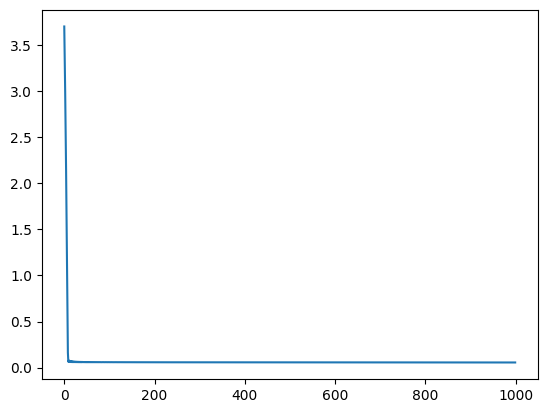

In [ ]:
import matplotlib.pyplot as plt
import random

def get_features(dataset):
    columns = []

    for i in range(6):
        for j in range(i, 6):
            if i != j:
                columns.append([elem[i] * elem[j] for elem in dataset])

    columns.append([1 for elem in dataset])

    return np.stack(columns, axis=1)

x_train_extended = get_features(x_train)
x_test_extended = get_features(x_test)

def msle(ys, ps):
    assert len(ys) == len(ps)

    np_ys = np.array(ys)
    np_ps = np.array(ps)

    return np.mean((np.log(1 + np_ys) - np.log(1 + np_ps))**2)

def predict(ws, xs):
    return xs @ ws

def gradient(ps, xs, ys):
    return ((2 * (np.log(1 + ps) - np.log(1 + ys)) / (1 + ps)) @ xs) / np.size(ps)

def evaluate(ws, xs, ys):
    return msle(ys, predict(ws, xs))

def linear_regression(ws, lr, epochs, xs, ys):
    subset = random.randint(0, 9)
    eval_xs = xs[subset * 20 : (subset + 1) * 20]
    eval_ys = ys[subset * 20 : (subset + 1) * 20]
    xs = np.delete(xs, np.s_[subset * 20 : (subset + 1) * 20], 0)
    ys = np.delete(ys, np.s_[subset * 20 : (subset + 1) * 20], 0)

    losses = []

    for i in range(epochs):
        ws = ws - lr * gradient(predict(ws, xs), xs, ys)
        losses.append(evaluate(ws, eval_xs, eval_ys))

    return ws, losses

weights = np.ones(16)
lr = 10
n_epochs = 1000

trained_weights, losses = linear_regression(weights, lr, n_epochs, x_train_extended, y_train)
print(losses[-1])
print(evaluate(trained_weights, x_test_extended, y_test))
plt.plot(losses)

To make the random split validation reliable, a huge chunk of training data may be needed. To get over this problem, one may apply cross-validaiton.

![alt-text](https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png)

Let's now implement the method. Make sure that:
* number of partitions is a parameter,
* the method is not limited to `mieszkania.csv`,
* the method is not limited to one specific model.

In [ ]:
def gradient_descent(ws, lr, epochs, partition, gradient, predict, loss, xs, ys):
    assert len(xs) == len(ys)

    fold_size = int(len(xs) / partition)
    losses = []
    final_loss = 0

    for i in range(partition):
        eval_xs = xs[i * fold_size : (i + 1) * fold_size]
        eval_ys = ys[i * fold_size : (i + 1) * fold_size]
        train_xs = np.delete(xs, np.s_[i * fold_size : (i + 1) * fold_size], 0)
        train_ys = np.delete(ys, np.s_[i * fold_size : (i + 1) * fold_size], 0)

        for j in range(epochs):
            ws = ws - lr * gradient(predict(ws, train_xs), train_xs, train_ys)
            losses.append(loss(eval_ys, predict(ws, eval_xs)))

        final_loss += losses[-1]

    final_loss /= partition
    losses.append(final_loss)

    return ws, losses

Recall that sometimes validation may be tricky, e.g. significant class imbalance, having a small number of subjects, geographically clustered instances...

What could in theory go wrong here with random, unstratified partitions? Think about potential solutions and investigate the data in order to check whether these problems arise here.

0.0489286662698117
0.07090298438404707


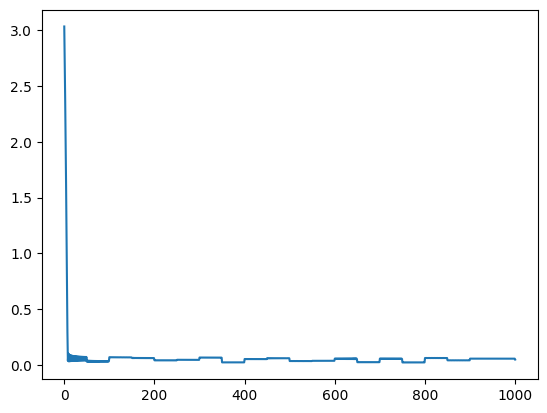

In [ ]:
weights = np.ones(16)
lr = 10
epochs = 50
partitions = 20

trained_ws, losses = gradient_descent(weights, lr, epochs, partitions, gradient, predict, msle, x_train_extended, y_train)
print(losses[-1])
print(evaluate(trained_ws, x_test_extended, y_test))
plt.plot(losses)